# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
cityIndex = 1
numberOfCities= len(cities)
# set up lists to hold reponse info

cityName=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat = []
lng=[]
maxTemp = []
windSpeed=[]

for city in cities:
    #We need to pause for a minute every 60 requests as the free API require
    if cityIndex % 60 == 0:
        print("Sleeping for a minute ZzZzZzzz")
        time.sleep(60)

    print(f"Processing Record {cityIndex} of {numberOfCities} | {city}")
    #Using the OpenWeather API to look up the weather in a particular city
    # Build the endpoint URL
    target_url = ('http://api.openweathermap.org/data/2.5/weather?q='
                  '{0}&appid={1}').format(city, api_key)
    
    # Run a request to endpoint and convert result to json
    weather_data = requests.get(target_url).json()
   
    try:
        cityName.append(weather_data['name'])
        cloudiness.append(weather_data['clouds']['all'])
        country.append(weather_data['sys']['country'])
        date.append(weather_data['dt'])
        humidity.append(weather_data['main']['humidity'])
        lat.append(weather_data["coord"]["lon"]) 
        lng.append(weather_data['coord']['lon'])
        maxTemp.append(weather_data['main']['temp_max'])
        windSpeed.append(weather_data['wind']['speed'])
    except:
        print("City not found. Skipping...")
    cityIndex = cityIndex +1


Processing Record 1 of 635 | oktyabrskoye
Processing Record 2 of 635 | sawankhalok
Processing Record 3 of 635 | bethel
Processing Record 4 of 635 | ushuaia
Processing Record 5 of 635 | grand gaube
Processing Record 6 of 635 | willowmore
Processing Record 7 of 635 | barcarena
Processing Record 8 of 635 | salalah
Processing Record 9 of 635 | nichinan
Processing Record 10 of 635 | mataura
Processing Record 11 of 635 | port alfred
Processing Record 12 of 635 | severo-kurilsk
Processing Record 13 of 635 | tessalit
Processing Record 14 of 635 | ponta do sol
Processing Record 15 of 635 | modica
Processing Record 16 of 635 | barrow
Processing Record 17 of 635 | cadillac
Processing Record 18 of 635 | nortelandia
Processing Record 19 of 635 | tocopilla
Processing Record 20 of 635 | puerto colombia
Processing Record 21 of 635 | clyde river
Processing Record 22 of 635 | weligama
Processing Record 23 of 635 | pucallpa
Processing Record 24 of 635 | lata
Processing Record 25 of 635 | shache
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [68]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": cityName,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxTemp,
    "Wind Speed": windSpeed,
    }
weather_data = pd.DataFrame(weather_dict)
weather_data.head()
weather_data.to_csv("Cities_weather.csv", encoding='utf-8')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

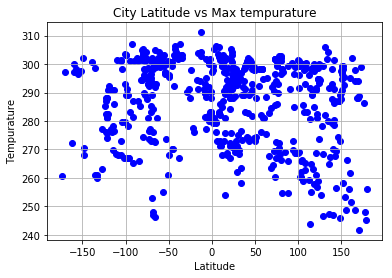

In [77]:
x_axis = weather_data["Lat"]
maxTemps = weather_data["Max Temp"]

plt.title("City Latitude vs Max tempurature")
plt.xlabel("Latitude")
plt.ylabel("Tempurature")
plt.grid(True)
plt.scatter(x_axis, maxTemps, marker="o", color="blue")
plt.show()

#### Latitude vs. Humidity Plot

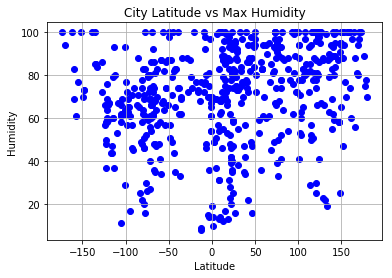

In [78]:
x_axis = weather_data["Lat"]
maxTemps = weather_data["Humidity"]

plt.title("City Latitude vs Max Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.scatter(x_axis, maxTemps, marker="o", color="blue")
plt.show()

#### Latitude vs. Cloudiness Plot

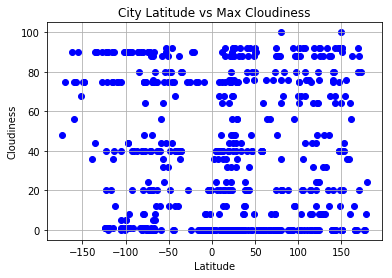

In [80]:
x_axis = weather_data["Lat"]
maxTemps = weather_data["Cloudiness"]

plt.title("City Latitude vs Max Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.scatter(x_axis, maxTemps, marker="o", color="blue")
plt.show()

#### Latitude vs. Wind Speed Plot

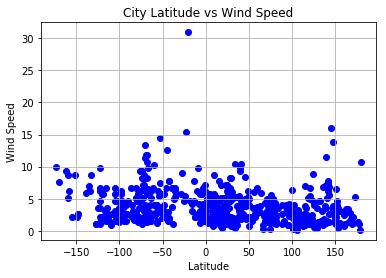

In [81]:
x_axis = weather_data["Lat"]
maxTemps = weather_data["Wind Speed"]

plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.scatter(x_axis, maxTemps, marker="o", color="blue")
plt.show()